# Sampling Data

In [4]:
# import matplotlib as mpl
%run prelude.py
mpl.rcParams['figure.figsize'] = (20,5)

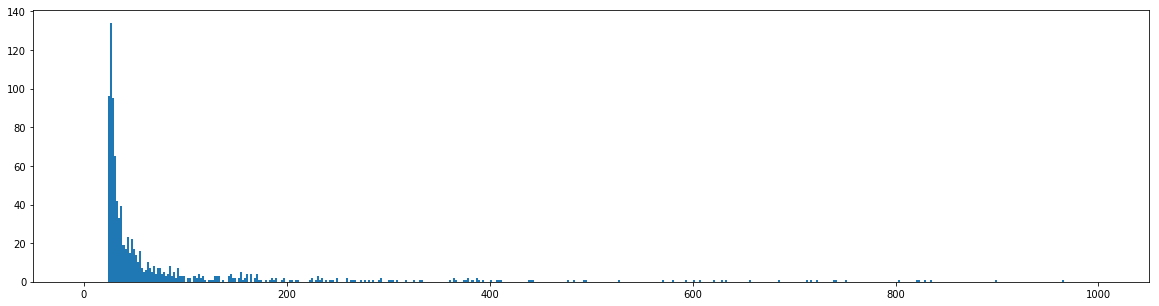

In [22]:
H("Generate some request latency data")
Y = stats.pareto(.5, scale=5, loc=20).rvs(1000)
plt.hist(Y,range=(0,1000),bins=500);
plt.show()
P(len(Y), "samples")

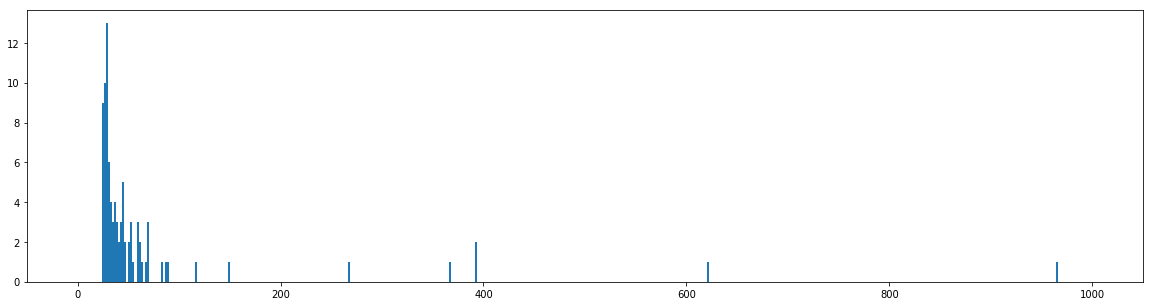

In [23]:
H("Subsample data")
SY = np.random.choice(Y, 100)
plt.hist(SY,range=(0,1000),bins=500)
plt.show()
P(len(SY),"samples")

In [24]:
# Statistics Calculated on SubSampled Data
def row(f):
    x = f(Y)
    y = f(SY)
    rerr = abs(x-y)/x*100
    return f(Y), f(SY), rerr

display(HTML(tabulate(
    [ 
        [ 'mean',  *row(lambda Y: np.mean(Y)) ],
        [ 'p50',   *row(lambda Y: np.percentile(Y, 50)) ],
        [ 'p90',   *row(lambda Y: np.percentile(Y, 90)) ],
        [ 'p99',   *row(lambda Y: np.percentile(Y, 99)) ],
        [ 'p99.9', *row(lambda Y: np.percentile(Y, 99.9)) ],
    ],
    headers = ",original data,sampled data,relative error %".split(","),
    floatfmt=".1f",
    tablefmt="html"
)))

,original data,sampled data,relative error %
mean,74613.3,2052.7,97.2
p50,37.6,39.1,3.8
p90,384.1,656.1,70.8
p99,32424.8,24700.8,23.8
p99.9,421672.8,93583.3,77.8


In [30]:
p = .5
def freq(x):
    if x > 200: return 0.9 * p
    if x > 100: return 0.5 * p
    return 0.1 * p

In [31]:
def sample(Y, freq):
    for y in Y:
        f = freq(y)
        p = np.random.random() # in [0 , 1)
        if p < f:
            yield (y, 1/f)

In [32]:
L = list(sample(Y, freq))
LS = sorted(L, key= lambda pair : pair[0])

In [33]:
def w_count(L):
    c = 0
    for y, w in L:
        c += w
    return c

In [34]:
print(len(L), w_count(L))


126 1161.777777777777


In [35]:
def w_percentile(L, p):
    # assumes L to be sorted
    N = w_count(L)
    r = np.floor(N * p)
    c = 0
    for y,w in L:
        c += w
        if c > r: return y

In [36]:
w_percentile(LS, 0.44)

29.88437473369946

In [39]:
from IPython.display import HTML, display
display(HTML(tabulate(
    [ [ p, np.percentile(Y, p), np.percentile(SY, p), (np.percentile(Y, p) - w_percentile(LS, p/100))/np.percentile(Y, p) ] for p in [50, 90, 99, 99.9, 99.99, 100] ],
    headers = "p,p-percentile,p-percentile sampled, p-percentile stratified".split(","),
    floatfmt=".3f",
    tablefmt="html"
)))

p,p-percentile,p-percentile sampled,p-percentile stratified
50.000,37.621,39.056,0.177
90.000,384.103,656.125,0.237
99.000,32424.822,24700.756,0.375
99.900,421672.811,93583.264,0.765
99.990,65619336.534,100471.515,0.998
100.000,72863521.392,101236.876,0.999
